# Saving To VMEC-Formatted Output

In [4]:
import sys
import os
sys.path.insert(0, os.path.abspath('.'))
sys.path.append(os.path.abspath('../../'))

In [8]:
%matplotlib inline
import desc.io # used for loading and saving data
from desc.plotting import plot_surfaces, plot_section # used to visualize the DESC results
from desc.vmec import VMECIO # used to save equilibrium objects as VMEC-formatted .nc files

In this notebook, we have just ran `python -m desc tests/inputs/SOLOVEV` in the main DESC directory, so we now have the DESC results file `tests/inputs/SOLOVEV_output.h5`. 
Now we load in the solved equilibrium. The results are stored in an `EquilibriaFamily` object, which is basically a list of equilibria from the first initial guess up until the final solved equilibrium. We will just extract the final solved equilibrium using the `[-1]` (The `EquilibriaFamily` object can be indexed like a list).

In [9]:
# the ../.. are just because this notebook is located in DESC/docs/notebooks
eq = desc.io.load(load_from='../../desc/examples/SOLOVEV_output.h5')[-1]

We can look at the final flux surfaces using the `plot_surfaces` function, and the final normalized force error with the `plot_section` function, both from `desc.plotting`:

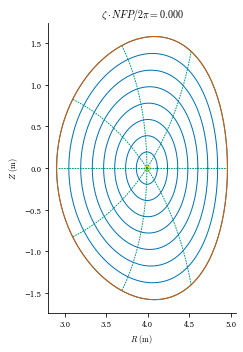

In [10]:
plot_surfaces(eq);

(<Figure size 360x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $|\\nabla p|$, $\\zeta \\cdot NFP/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

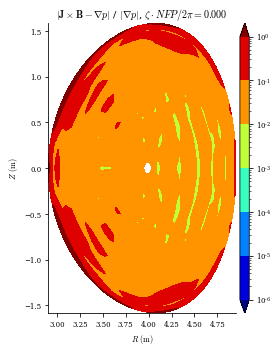

In [4]:
# we want to plot the magnitude of the force error |F|, and we want it shown normalized by the pressure gradient
plot_section(eq, name='|F|', norm_F=True, log=True);

To save the equilibrium in a VMEC-formatted `.nc` file, we use the `VMECIO` class we imported from `desc.vmec`. This class will convert the quantities defining the equilibrium from DESC coordinates to VMEC equivalents.

In [5]:
VMECIO.save(eq, './SOLOVEV_output.nc')

Saving parameters
Saving R
Saving Z
Saving lambda
Saving Jacobian
Saving |B|
Saving B^theta
Saving B^zeta
Saving B_psi
Saving B_theta
Saving B_zeta
Saving J^theta
Saving J^zeta


We now have a file `SOLOVEV_output.nc` which is the equivalent Equilibrium solution in the VMEC coordinates and data format. We can now treat it as any other VMEC .nc file. For example, we can use our VMEC comparison tools to compare the two files now, such as comparing the flux surfaces using `VMECIO.plot_vmec_comparison` (which unsurprisingly are the same):

(<Figure size 432x432 with 1 Axes>,
 array([<AxesSubplot:xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

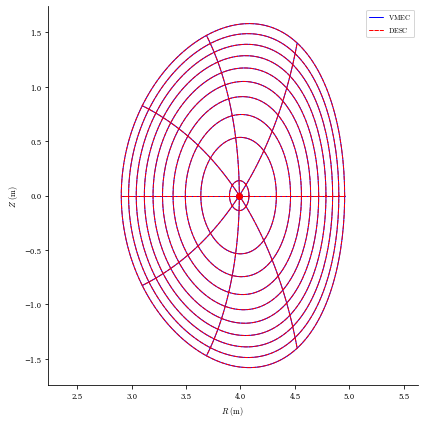

In [6]:
vmec_formatted_eq_file = './SOLOVEV_output.nc'
VMECIO.plot_vmec_comparison(eq, vmec_formatted_eq_file);